## Setup


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Create a regular grid in XY plane
x_lin = np.linspace(0, 10, 20)
y_lin = np.linspace(0, 10, 20)
X, Y = np.meshgrid(x_lin, y_lin)


## False Color Image from Scalar Field

See the _multivariable_ notebook for how to control the range, the scaling, and the color mapping.


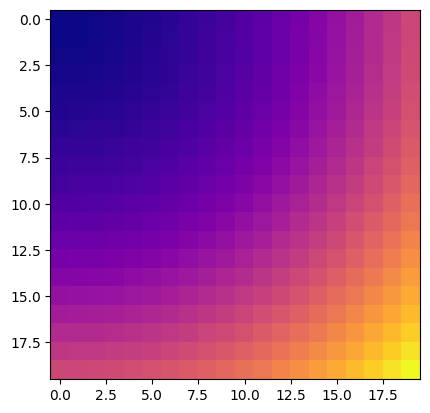

In [3]:
# Create a scalar field over that grid
Z = X**2 + Y**2

fig, ax = plt.subplots()
ax.imshow(Z, cmap='plasma')

## RGB Image from Scratch

Also supports _RGBA_.

In this case the channels are _floats_ from 0-1.


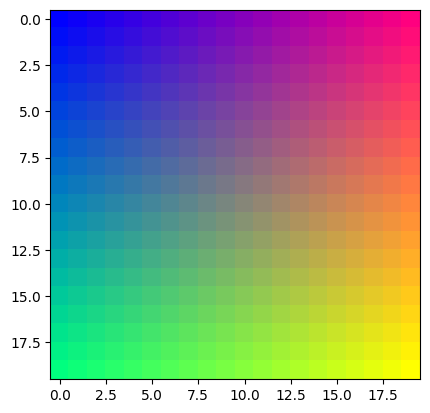

In [4]:
# Calculate field for each color channel.
R = (X / 10)[..., np.newaxis]
G = (Y / 10)[..., np.newaxis]
B = (1 - (R + G) / 2)
# Put the fields together into one RGB matrix.
image_data = np.concatenate([R, G, B], axis=-1)

fig, ax = plt.subplots()
ax.imshow(image_data)

## RGB Image with Integers (0-255)


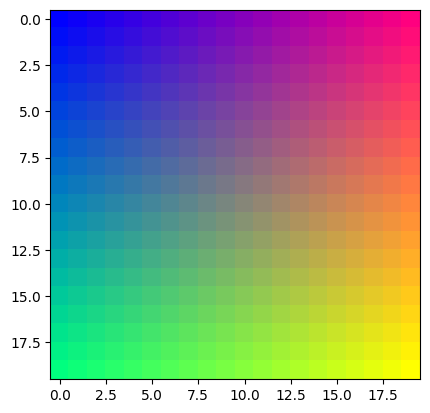

In [5]:
assert (image_data is not None)  # make sure previous cell was run

# Convert to integer representation
image_data_rgb = (image_data * 255).astype(np.uint8)

fig, ax = plt.subplots()
ax.imshow(image_data_rgb)

## Pillow Image


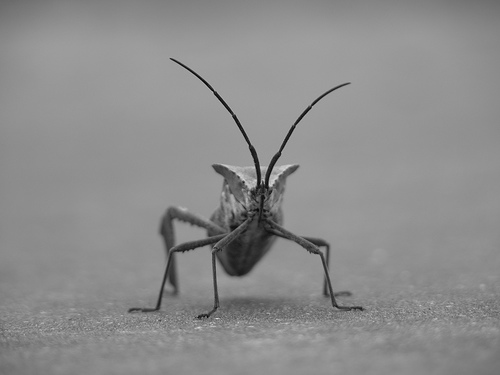

In [6]:
image = Image.open('images/stinkbug.png')

image

## Convert to numpy array


In [7]:
image_np = np.asarray(image)
print(image_np.shape)
print(image_np.dtype)

(375, 500, 3)
uint8


## Plot using matplotlib


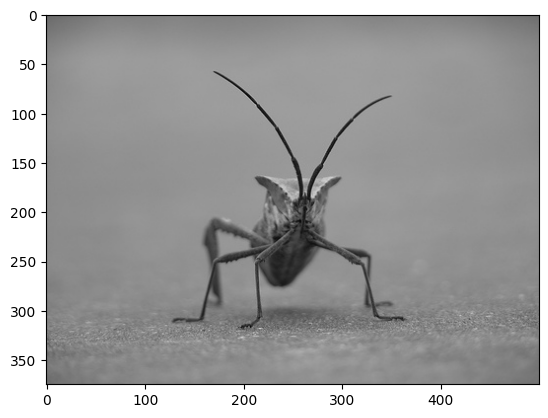

In [8]:
fig, ax = plt.subplots()
ax.imshow(image_np)

## Extract color channel


Blue channel shape: (375, 500)


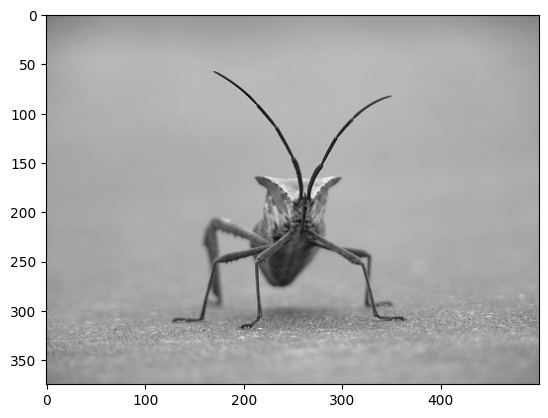

In [9]:
blue_channel = image_np[:, :, 2]
print(f'Blue channel shape: {blue_channel.shape}')

fig, ax = plt.subplots()
ax.imshow(blue_channel, cmap='gray')

pass

## False colorize the extracted channel


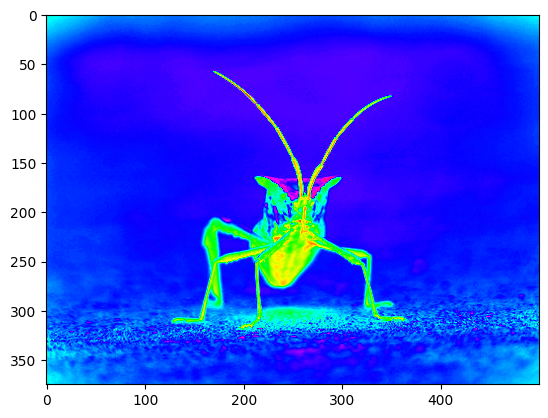

In [10]:
blue_channel = image_np[:, :, 2]

fig, ax = plt.subplots()
ax.imshow(blue_channel, cmap='hsv')

pass

## Histogram


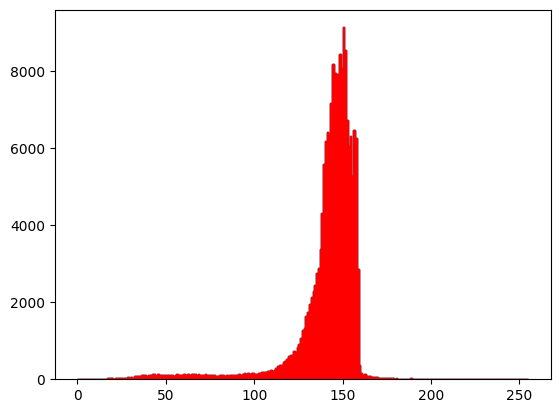

In [12]:
# Doesn't work as well for this image since it's greyscale.
plt.hist(image_np[:, :, 2].ravel(), bins=range(256), fc='b', ec='b')
plt.hist(image_np[:, :, 1].ravel(), bins=range(256), fc='g', ec='g')
plt.hist(image_np[:, :, 0].ravel(), bins=range(256), fc='r', ec='r')
pass

## Display image directly

NOTE: _imread_ is _deprecated_


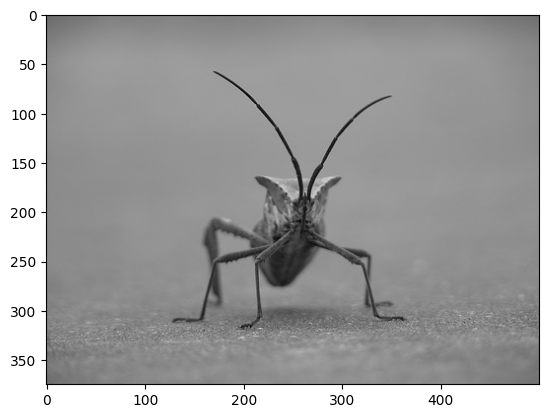

In [23]:
plt.imshow(
    Image.open('images/stinkbug.png'))  # no numpy needed if not transforming
pass

## Resample image


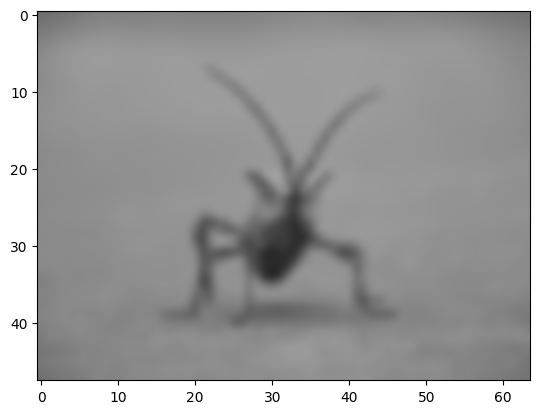

In [17]:
# Perform the downsample.
thumbnail = Image.open('images/stinkbug.png')
thumbnail.thumbnail((64, 64))

# Interpolate back up for display.
plt.imshow(thumbnail, interpolation='bicubic')

pass

## Hide Axes


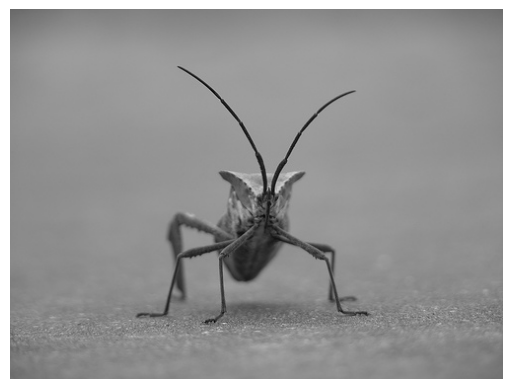

In [19]:
plt.imshow(
    Image.open('images/stinkbug.png'))  # no numpy needed if not transforming
plt.axis('off')  # looks same if use the fig,axes version as well
pass

## Keep Border but No Tick Marks or Labels


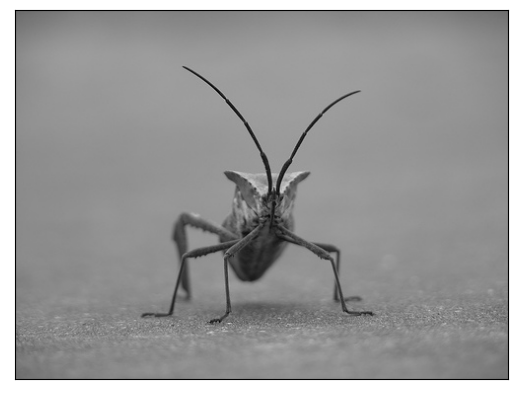

In [21]:
plt.imshow(
    Image.open('images/stinkbug.png'))  # no numpy needed if not transforming
plt.xticks([])
plt.yticks([])
pass